<a href="https://colab.research.google.com/github/PaulToronto/University-of-Colorado-Boulder---Essential-Math-Specialization/blob/main/2_5_Projections_and_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.5 Projections and Least Squares

## Imports

In [59]:
import sympy as sym
import numpy as np

import matplotlib.pyplot as plt

## 2.5.1 Important Final Concepts

### 2.5.1.1 Transpose and Inner (Dot) Product

#### Transpose

The rows and the columns are flipped.

$$
\mathbf{A} = \begin{bmatrix}3&4\\2&5\\1&6\end{bmatrix},
\mathbf{A^{T}} = \begin{bmatrix}3&2&1\\4&5&6\end{bmatrix}
$$

In [2]:
A = np.array([[3, 4],
              [2, 5],
              [1, 6]])

In [3]:
A.T

array([[3, 2, 1],
       [4, 5, 6]])

In [4]:
A = sym.Matrix(A)
A

Matrix([
[3, 4],
[2, 5],
[1, 6]])

In [5]:
A.T

Matrix([
[3, 2, 1],
[4, 5, 6]])

In [6]:
B = sym.Matrix([1, 2, 3])
B

Matrix([
[1],
[2],
[3]])

In [7]:
B.T

Matrix([[1, 2, 3]])

In [8]:
B.T.T

Matrix([
[1],
[2],
[3]])

#### Dot Product (aka Inner Product)

The dot product is **commutative**.

$$
\mathbf{u} = \begin{bmatrix}2\\-5\\-1\end{bmatrix},
\mathbf{v} = \begin{bmatrix}3\\2\\-3\end{bmatrix}
$$

In [9]:
u = np.array([[2], [-5], [-1]])
u

array([[ 2],
       [-5],
       [-1]])

In [10]:
v = np.array([[3], [2], [-3]])
v

array([[ 3],
       [ 2],
       [-3]])

In [11]:
np.dot(u.T, v)

array([[-1]])

In [12]:
np.dot(u.T, u)

array([[30]])

In [13]:
u.T.dot(v)

array([[-1]])

In [14]:
sum(u * v)

array([-1])

In [15]:
u = sym.Matrix(u)
u

Matrix([
[ 2],
[-5],
[-1]])

In [16]:
v = sym.Matrix(v)
v

Matrix([
[ 3],
[ 2],
[-3]])

In [17]:
u.dot(v)

-1

### 2.5.1.2 Norm (Length) of a Vector

$$
\mathbf{v} = \begin{bmatrix}v_1\\v_2\\\vdots\\v_n\end{bmatrix}
$$

$$
\begin{align}
&\left|v\right|^{2} = v \cdot v \\
&\implies \left|v\right| = \sqrt{v \cdot v}
\end{align}
$$

In [18]:
v1, v2, v3 = sym.symbols('v_1 v_2 v_3')

v = sym.Matrix([v1, v2, v3])
v

Matrix([
[v_1],
[v_2],
[v_3]])

In [20]:
v_norm = sym.sqrt(v.dot(v))
v_norm

sqrt(v_1**2 + v_2**2 + v_3**2)

In [21]:
v.norm()

sqrt(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)

In [22]:
u = np.array([[1], [2], [3]])
u

array([[1],
       [2],
       [3]])

In [23]:
np.sqrt(u.T.dot(u))

array([[3.74165739]])

In [25]:
np.linalg.norm(u)

3.7416573867739413

### 2.5.1.3 Unit Vector Creation

$$
\mathbf{v} = \begin{bmatrix}1\\-2\\2\\0\end{bmatrix}
$$

Let $\mathbf{u}$ be the unit vector version of $\mathbf{v}$

$$
\mathbf{u} = \frac{1}{\left|\mathbf{v}\right|}\mathbf{v}
$$

In [26]:
v = np.array([[1], [-2], [2], [0]])
v

array([[ 1],
       [-2],
       [ 2],
       [ 0]])

In [31]:
np.linalg.norm(v)

3.0

In [32]:
v_unit = np.array([[1/3], [-2/3], [2/3], [0]])
v_unit

array([[ 0.33333333],
       [-0.66666667],
       [ 0.66666667],
       [ 0.        ]])

In [28]:
v_unit = v / np.linalg.norm(v)
v_unit

array([[ 0.33333333],
       [-0.66666667],
       [ 0.66666667],
       [ 0.        ]])

In [30]:
np.linalg.norm(v_unit)

1.0

In [33]:
v = sym.Matrix(v)
v

Matrix([
[ 1],
[-2],
[ 2],
[ 0]])

In [37]:
v / v.norm()

Matrix([
[ 1/3],
[-2/3],
[ 2/3],
[   0]])

In [38]:
from sklearn.preprocessing import normalize

In [41]:
v = np.array([[1], [-2], [2], [0]])
v

array([[ 1],
       [-2],
       [ 2],
       [ 0]])

In [43]:
normalize(v, axis=0)

array([[ 0.33333333],
       [-0.66666667],
       [ 0.66666667],
       [ 0.        ]])

In [47]:
v = np.array([1, -2, 2, 0]).reshape(1, -1)
v

array([[ 1, -2,  2,  0]])

In [48]:
normalize(v)

array([[ 0.33333333, -0.66666667,  0.66666667,  0.        ]])

### 2.5.1.4 Distance Between Two Vectors

The distance between $\mathbf{u}$ and $\mathbf{v}$ is $\left|\mathbf{u} - \mathbf{v}\right|$

 $$
 \mathbf{u} = \begin{bmatrix}1\\2\\4\end{bmatrix},
 \mathbf{v} = \begin{bmatrix}-1\\3\\-6\end{bmatrix}
 $$

<br>

 $$
 \begin{align}
 \left|\mathbf{u} - \mathbf{v}\right| &= \left|
 \begin{bmatrix}1 - (-1)\\2 - 3\\4 - (-6)\end{bmatrix}
 \right| \\
 &= \left|\begin{bmatrix}2\\-1\\10\end{bmatrix}\right| \\
 &= \sqrt{2^{2} + (-1)^{2} + 10^{2}} \\
 &= \sqrt{105}
 \end{align}
 $$

In [56]:
u = sym.Matrix([1, 2, 4])
u

Matrix([
[1],
[2],
[4]])

In [57]:
v = sym.Matrix([-1, 3, -6])
v

Matrix([
[-1],
[ 3],
[-6]])

In [58]:
(u - v).norm()

sqrt(105)

## 2.5.2 Orthogonality, Projections and Least Squares

### 2.5.2.1 Orthogonal Vectors

1. $\mathbf{u}$ and $\mathbf{v}$ are orthogonal to each other if and only if $\mathbf{u} \cdot \mathbf{v}$
2. If $\mathbf{u}$ and $\mathbf{v}$ are orthogonal to each other, then $\left|\mathbf{u} + \mathbf{v}\right|^{2} = \mathbf{u}^{2} + \mathbf{v}^{2}$

In $\mathbb{R}^{2}$ and $\mathbb{R}^{3}$, $\mathbf{u}\cdot\mathbf{v} = \left|\mathbf{u}\right|\left|\mathbf{v}\right|\cos{\theta}$, where $\theta$ is the angle between $\mathbf{u}$ and $\mathbf{v}$.

### 2.5.2.2 Orthogonal Projections

I've decided to use `plt.arrow` instead of `plt.quiver`. I think this is a better choice for drawing vectors.

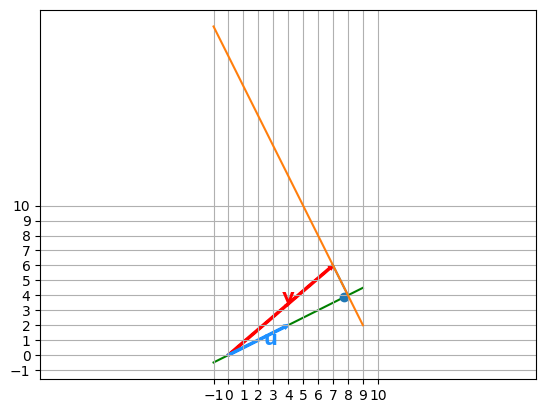

In [217]:
y = np.array([7, 6])
u = np.array([4, 2])

# Line L
slope_u = u[1] / u[0]
slope_proj = -u[0] / u[1]
x_l = np.linspace(-1, 9, 100)
y_l = slope_u * x_l
plt.plot(x_l, y_l, color='green', zorder=-1)


# vector y
plt.arrow(0, 0, *y,
          width=0.05,
          linewidth=2,
          color='red',
          length_includes_head=True)
plt.annotate('$\mathbf{y}$', xy=(3.5, 3.5),
             size=14, color='red')

# vector u
plt.arrow(0, 0, *u,
          width=0.05,
          linewidth=2,
          color='dodgerblue',
          length_includes_head=True)
plt.annotate('$\mathbf{u}$', xy=(2.3, 0.7),
             size=14, color='dodgerblue')

# projection of y on u
proj_u_y = (y.T.dot(u) / u.T.dot(u)) * u
plt.plot((y[0], proj_u_y[0]), (y[1], proj_u_y[1]))

# slope of u
_x = sym.symbols('x')
x_on_u = min(sym.solve((proj_u_y[0] - _x)**2 + (proj_u_y[1] - slope_u*_x)**2 - 1/10,
                       _x)).evalf()
y_on_u = slope_u * x_on_u
plt.scatter(x_on_u, y_on_u)

plt.plot(x_l, slope_proj * (x_l - proj_u_y[0]) + proj_u_y[1])




plt.xticks(np.linspace(-1, 10, 12))
plt.yticks(np.linspace(-1, 10, 12))
plt.axis('equal')
plt.grid()

In [220]:
sym.solve((proj_u_y[0] - _x)**2 + (proj_u_y[1] - slope_u*_x)**2 - 1/10,
                       _x)

[7.71715728752538, 8.28284271247462]

In [223]:
(proj_u_y[0] - _x)**2 + (proj_u_y[1] - slope_u*_x)**2

80.0*(1 - 0.125*x)**2

In [222]:
(proj_u_y[0] - _x)**2 + (proj_u_y[1] - slope_proj * (_x - proj_u_y[0]) + proj_u_y[1])**2


64.0*(1 - 0.125*x)**2 + 64.0*(0.25*x - 1)**2